Steps Followed :
* EDA
* Data Visualization
* Feature Selection
* Binary Classification


# **Required Packages**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from os import path

# importing library for plotting
import matplotlib.pyplot as plt

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import*
from sklearn.preprocessing import * 

from sklearn.ensemble import RandomForestClassifier

# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# **Reading And Understanding Data**

* Load dataset
* Some statistical Computation







## Reading Data

Have you ever wondered how your computer/network is able to avoid being infected with malware and bad traffic inputs from the internet?
The reason why it can detect it so well is because there are systems in place to protect your valuable information held in your computer or networks. These systems that detect malicious traffic inputs are called **Intrusion Detection Systems (IDS)** and are **trained on internet traffic record data**. **The most common data set** is the **NSL-KDD**, and is the benchmark for modern-day internet traffic.

These data sets contain the **records of the internet traffic** seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains **43 features** per record, with **41 of the features referring to the traffic input** itself and the **last two are labels** (whether it is a normal or attack) and **Score** (the severity of the traffic input itself).

In [2]:
train = 'Data/KDDTrain+.txt'
test = 'Data/KDDTest+.txt'

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}

In [4]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [5]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

🧠 Why Remove It?
The difficulty_level column in the NSL-KDD dataset is not an actual feature describing the network traffic — it’s a helper column added by dataset creators for research purposes.
It indicates how difficult a record is to classify (used for evaluation and analysis), not for prediction.

⚠️ If you keep it:
The model would learn using this artificial value, which leaks test information and gives unrealistically high accuracy.
It doesn’t represent real network behavior → causes data leakage and overfitting.

In [7]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [8]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


## Data Type Checking and Statistical Reports

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
train_data.describe().T
# T - transpose

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


# **Data Analysis**


*   Data Visualization
*   Data Mining



## **Univariate Analysis**

In [11]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")

### Label

In [12]:
# number of attack labels
train_data['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

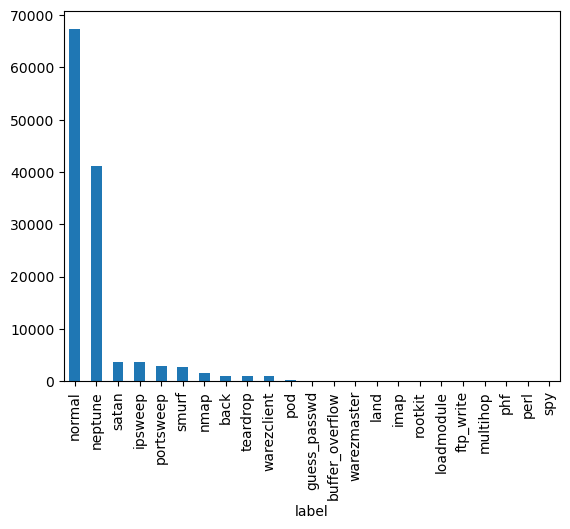

In [13]:
bar_graph('label')

Within the data set exists **4 different classes of attacks**:

*   **Denial of Service (DoS)**
*   **Probe**
*   **User to Root(U2R)**
*   **Remote to Local (R2L)**











**DoS** is an attack that **tries to shut down traffic flow** to and from the target system. **The IDS is flooded with an abnormal amount of traffic**, which the **system can’t handle**, and **shuts down to protect itself**. This prevents normal traffic from visiting a network. An example of this could be an online retailer getting flooded with online orders on a day with a big sale, and because the network can’t handle all the requests, it will shut down preventing paying customers to purchase anything. **This is the most common attack in the data set**.

**Probe** or surveillance is an attack that **tries to get information from a network**. The goal here is to act like a thief and **steal important information**, whether it be personal information about clients or banking information.

**U2R** is an attack that **starts off with a normal user account** and **tries to gain access to the system or network, as a super-user (root)**. The attacker attempts to exploit the vulnerabilities in a system to **gain root privileges/access**.

**R2L** is an attack that tries to **gain local access to a remote machine**. **An attacker does not have local access to the system/network**, and tries to “hack” their way into the network.

It is noticed from the descriptions above that **DoS acts differently from the other three attacks**, where **DoS attempts to shut down a system to stop traffic flow altogether**, whereas the **other three attempts to quietly infiltrate the system undetected**.

In the table below, a breakdown of the **different subclasses of each attack** that exists in the data set is shown:

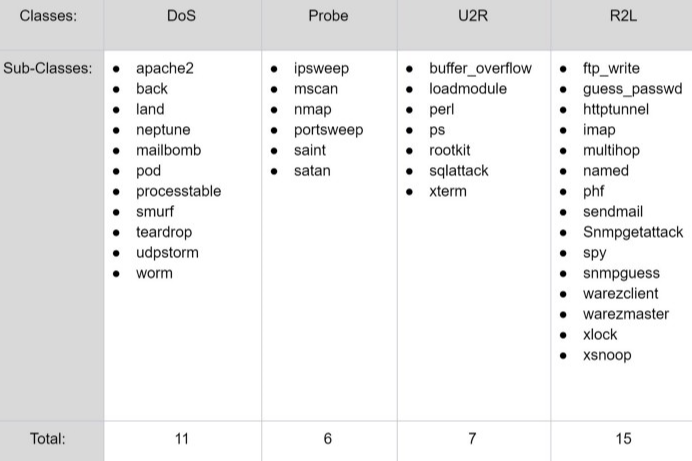

In [14]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



In [16]:
change_label(train_data)

In [17]:
# distribution of attack classes
train_data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

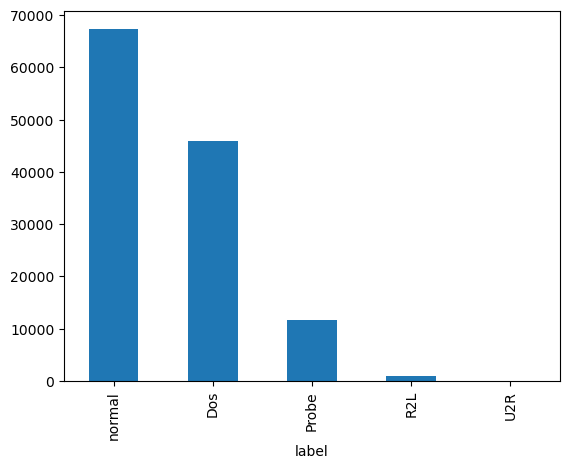

In [18]:
bar_graph('label')

In [19]:
# distribution of attack classes
train_data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

### Protocol

*   **Attribute No.** : 2
*   **Attribute Name.** : Protocol_type
*   **Description** : Protocol used in the connection



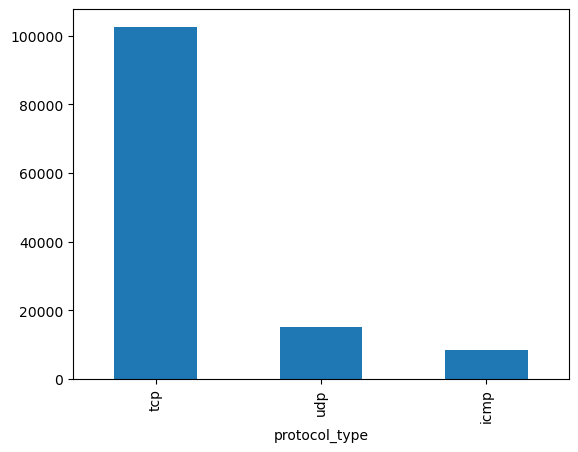

In [20]:
bar_graph('protocol_type')

### Services

*   **Attribute No.** : 3
*   **Attribute Name.** : Service
*   **Description** : Destination network service used





In [21]:
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index) #only top 30
services_frequency 

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [22]:
subsetServices

['http',
 'private',
 'domain_u',
 'smtp',
 'ftp_data',
 'eco_i',
 'other',
 'ecr_i',
 'telnet',
 'finger',
 'ftp',
 'auth',
 'Z39_50',
 'uucp',
 'courier',
 'bgp',
 'whois',
 'uucp_path',
 'iso_tsap',
 'time',
 'imap4',
 'nnsp',
 'vmnet',
 'urp_i',
 'domain',
 'ctf',
 'csnet_ns',
 'supdup',
 'discard',
 'http_443']

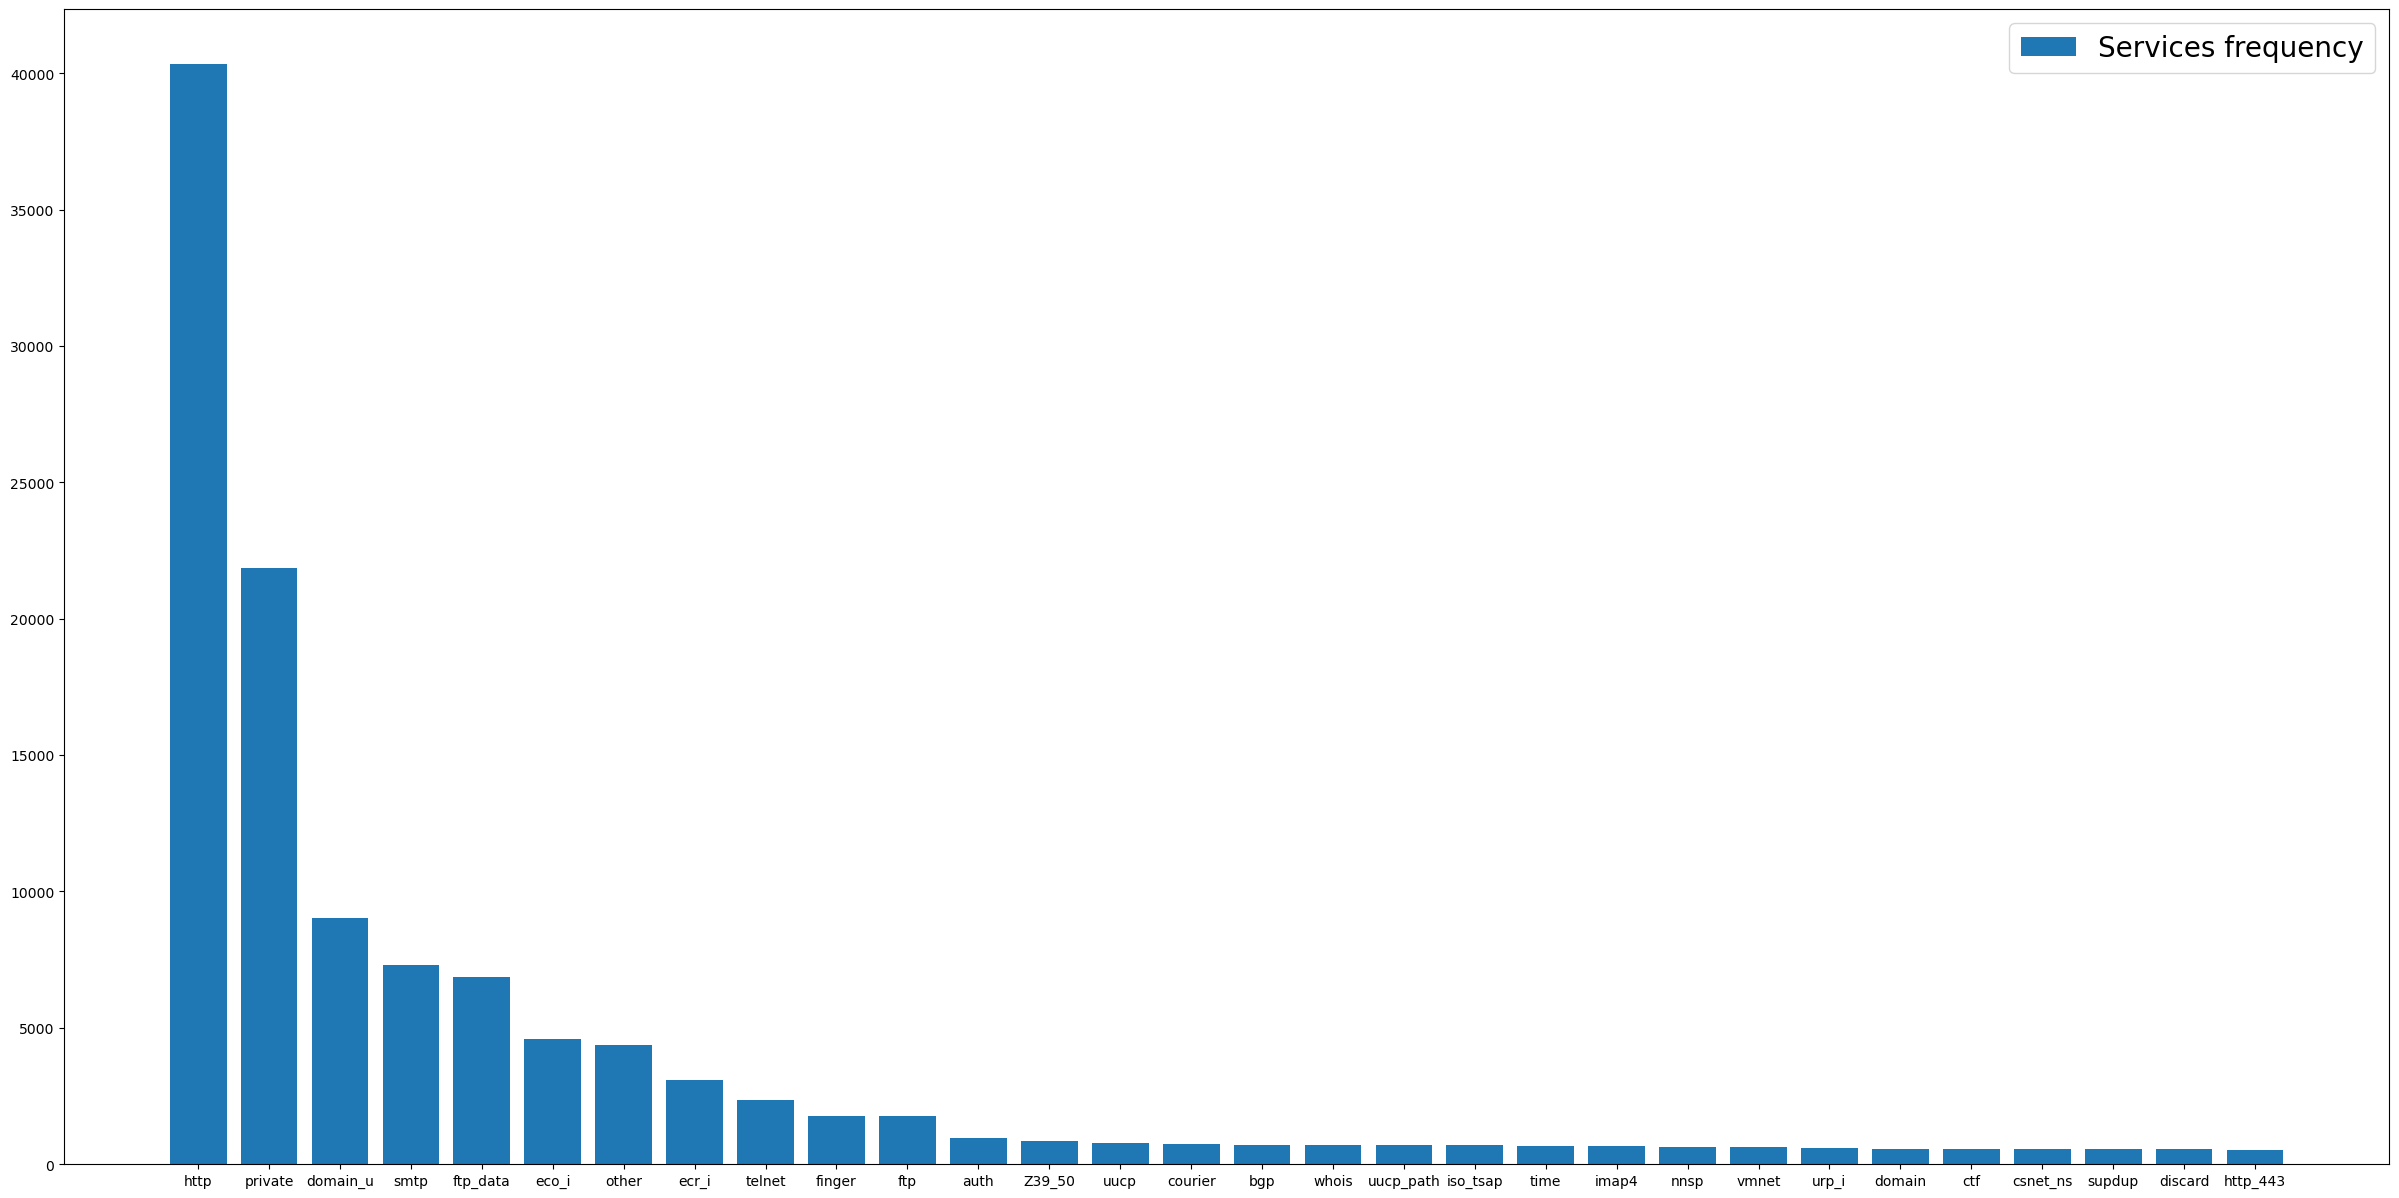

In [23]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,15)) # set the size that you'd like (width, height)
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

### Duration

*   **Attribute No.** : 1

*   **Attribute Name.** : Duration

*   **Description** : Length of time duration of the connection


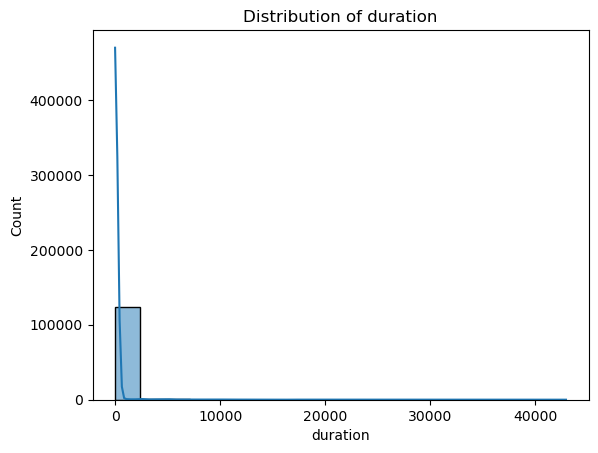

In [24]:
import seaborn as sns
df = train_data[['duration']]   # double brackets to keep DataFrame format
data_feature = df.columns

for feature in data_feature:
    p = sns.histplot(df[feature], kde=True)  
    plt.title(f"Distribution of {feature}")
    plt.show()


### Flag

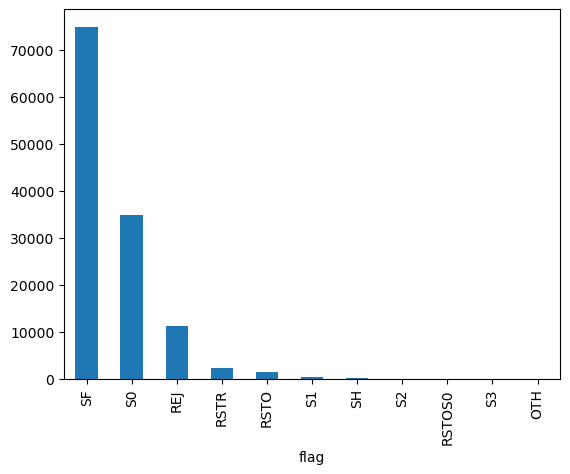

In [25]:
bar_graph('flag')

## **Bivariate Analysis**

### Protocol, Attack Types

In [26]:
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

In [27]:
data = {'protocol':[],'Attack_class':[],'number of sample in Dataset':[]}

In [28]:
for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type']== pro) & (train_data['label']==lab)])
    if (i != 0):
      data['protocol'].append(pro)
      data['Attack_class'].append(lab)
      data['number of sample in Dataset'].append(i)

# This loop counts how many times each attack type occurs under each protocol type and stores that summary in the data dictionary.

In [29]:
df = pd.DataFrame(data)

In [30]:
df.sort_values(by=['number of sample in Dataset'], ascending=False, ignore_index=True)

,protocol,Attack_class,number of sample in Dataset
0,tcp,Dos,42188
1,tcp,Probe,5857
2,icmp,Probe,4135
3,icmp,Dos,2847
4,udp,Probe,1664
5,tcp,R2L,995
6,udp,Dos,892
7,tcp,U2R,49
8,udp,U2R,3


### Service, Attack Types

In [31]:
data_service = {'service':[], 'Attack_class':[], 'number of sample in Dataset':[]}

# df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [32]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique()
Label= np.delete(Label, np.where(Label == 'normal'))

In [33]:
for ser in services:
  for lab in Label:
    i = len(train_data.loc[(train_data['service']== ser) & (train_data['label']==lab)])
    if (i != 0):
      data_service['service'].append(ser)
      data_service['Attack_class'].append(lab)
      data_service['number of sample in Dataset'].append(i)
df_service = pd.DataFrame(data_service)

In [34]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
3,private,Dos,15971
4,private,Probe,4900
12,eco_i,Probe,4089
17,ecr_i,Dos,2844
0,http,Dos,2255
...,...,...,...
90,login,R2L,2
128,http_8001,Probe,2
129,aol,Probe,2
114,IRC,Probe,1


### Protocol, Services

In [35]:
SP= pd.crosstab(train_data.service,train_data['protocol_type'],margins=True).T
SP

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,...,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,...,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,...,0,0,654,0,0,780,689,617,693,102689
udp,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,...,3,8,654,10,602,780,689,617,693,125973


# **Data Prepration**




## Binary Classification


*   bin_data_train -> ready dataframe for Modeling






In [36]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [37]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [38]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [39]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [40]:
# one-hot-encoding attack label
#numeric_bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
#bin_data['label'] = bin_label
bin_data['intrusion'] =enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0


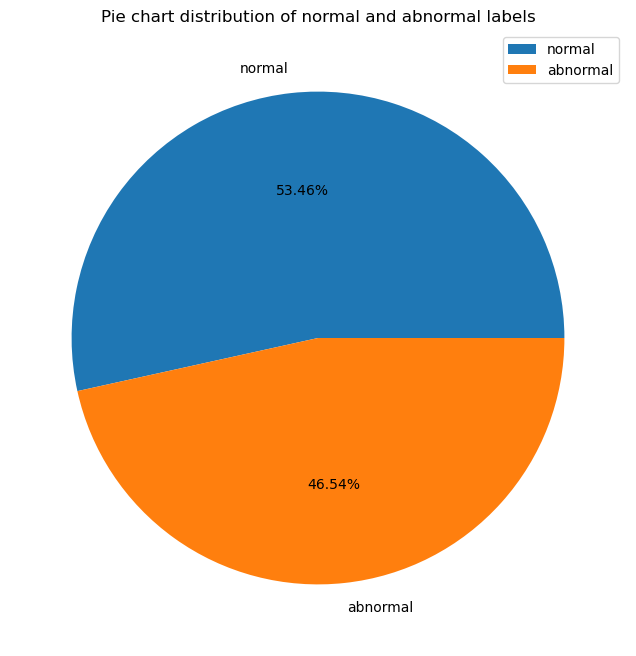

In [41]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_label.label.value_counts(),labels=bin_label.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [42]:
#bin_data_train is dataset that is ready for modeling 
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,1
125970,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,1
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,0


In [43]:
# this data set is include just numeric features with multi labels
#created for feature selection
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col].copy()  
numeric_bin_data['intrusion'] = bin_data['intrusion'].values


In [44]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


# **Feature Selection**
we do this because we prefer that train models with significant features and get reliable model to classify test set

In [45]:
#num_dataset_bin is just include numeric features with binary labels
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [46]:
#dataset_bin is include whole features (with encoded non numeric features like services, protocol and flag) with binary labels
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


## Feature Importance

### pearson correlation for binary class dataset



*   feature extraction from numeric_bin_data
*   pearson_bin_dataset is binary-class dataset based on pearson corrolation between numeric features and binary-class ( Intrusion-> yes(1)/no(0))



In [47]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)
# Features with correlation > 0.5 or < -0.5 are called highly correlated,
# because they have a strong relationship with the target label (intrusion).

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [48]:
highest_corr_columns= highest_corr.index

In [49]:
highest_corr_columns

Index(['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'intrusion'],
      dtype='object')

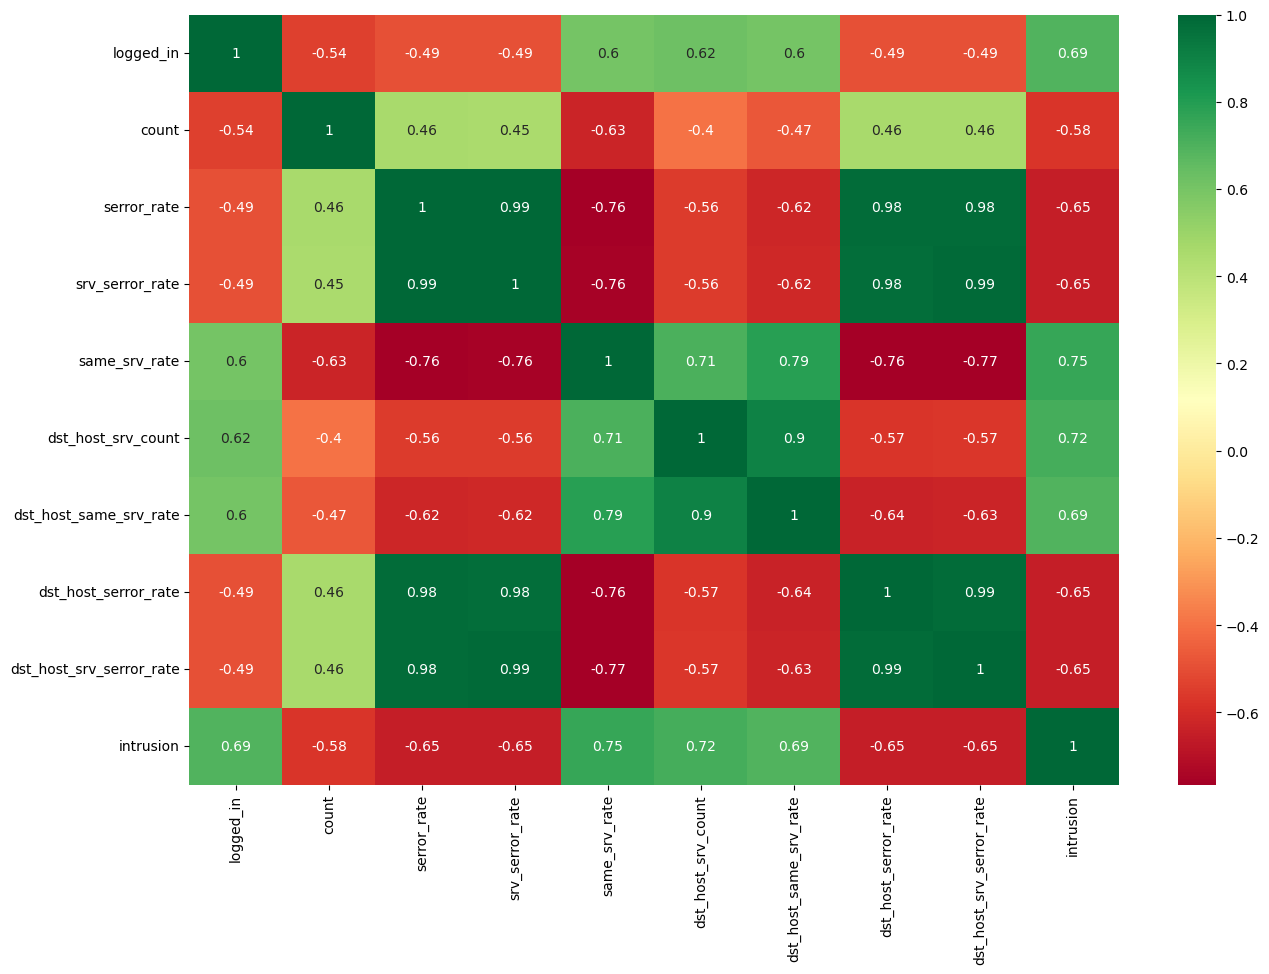

In [50]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [51]:
# then joining encoded, one-hot-encoded, and original attack label attribute
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


### Chi Square

used for feature selection (binary classification)



1.   Define Hypothesis.

*   Null Hypothesis (H0): Two variables are independent.
*   Alternate Hypothesis (H1): Two variables are not independent.


2.   Build a Contingency table.


*   number of sample in dataset that use tcp protocol type and led to intusion
*   number of sample in dataset that use tcp protocol type and led to normal situation


*   Degrees of freedom for contingency table is given as (r-1) * (c-1) where r,c are rows and columns.





3.   Find the expected values.



*   Based on the null hypothesis that the two variables are independent. We can say if A, B are two independent events P(A^B)= P(A)*P(B)

*   Let’s calculate the expected value for the first cell that is those who are Males and are Exited from the bank. E1= n*p


4.   Calculate the Chi-Square statistic.


*   O- Observed Valued / E- Expected Values
*   (Square of O-E)/E

5.   Accept or Reject the Null Hypothesis.




In [52]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#feature selection of all features (numeric and categorical features)
chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [53]:
# Array[0] → Chi-square values (feature importance) - “How much does it help my model?”
# Array[1] → p-values (significance) - “Is this relationship real?”

In [54]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)
p_values.sort_values(ascending = False , inplace = True)

In [55]:
p_values

tim_i                     0.608158
is_host_login             0.350784
ftp                       0.346692
http_2784                 0.283840
urgent                    0.177658
                            ...   
dst_host_diff_srv_rate    0.000000
dst_host_same_srv_rate    0.000000
dst_host_srv_count        0.000000
duration                  0.000000
num_outbound_cmds              NaN
Length: 122, dtype: float64

In [56]:
#select 20 best features
p_values = p_values[:20]

<Axes: >

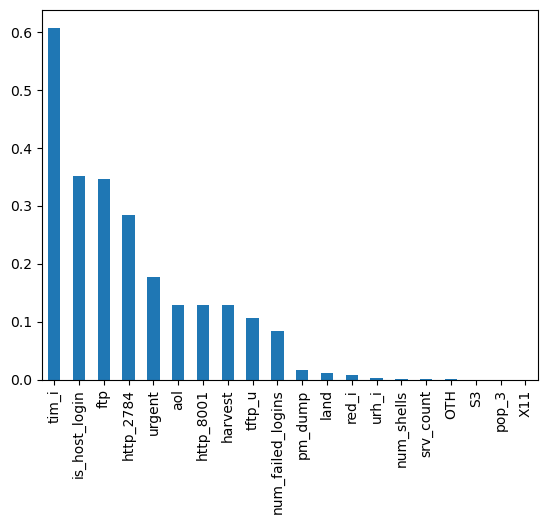

In [57]:
p_values.plot.bar()

### chisquare on numeric features

In [58]:
#feature selection of numeric features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)

In [59]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [60]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [61]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))  #print 10 best features
data_chi2_10best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [62]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [63]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,25,184,255,1.00,1.0,1.0,1.00
125969,105,145,8,244,2,255,0.00,0.0,0.0,0.00
125970,2231,384,0,30,1,255,0.00,0.0,0.0,0.72
125971,0,0,0,8,144,255,1.00,1.0,1.0,1.00


### xgboost

In [64]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X_train_bin,y_train_bin)
print(model.feature_importances_)

[2.7421024e-03 1.4755671e-01 1.0213025e-02 0.0000000e+00 1.8046872e-04
 0.0000000e+00 2.9900899e-02 0.0000000e+00 2.2438113e-02 6.2477711e-04
 5.5812043e-04 3.5497185e-04 4.2491965e-04 1.2032053e-03 7.2333019e-04
 5.6626560e-04 0.0000000e+00 0.0000000e+00 5.8290898e-04 1.3408668e-02
 4.1047446e-03 1.3115585e-03 6.1826588e-04 6.8926741e-04 1.6181891e-04
 8.4397208e-04 1.5792238e-03 4.5096668e-04 1.2799511e-03 3.7032093e-03
 1.4681371e-02 2.0675026e-03 1.2093398e-02 3.0965516e-03 2.3982415e-03
 2.2903904e-03 2.3861143e-03 5.5590877e-04 3.6833938e-03 2.1269489e-03
 1.1000931e-03 1.3895163e-04 7.9133862e-04 0.0000000e+00 0.0000000e+00
 8.1942155e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.2113339e-03 0.0000000e+00
 4.4629793e-04 4.5533437e-01 0.0000000e+00 0.0000000e+00 1.3276688e-03
 0.0000000e+00 1.1172633e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.9745494e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

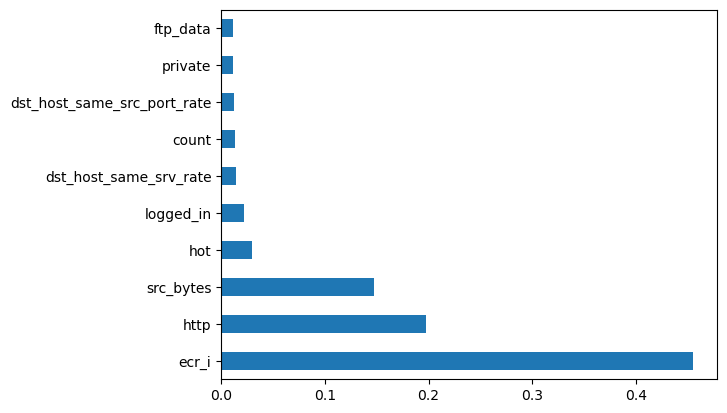

<Figure size 800x600 with 0 Axes>

In [65]:
# plot the graph of feature importances for better visualization
#feature selection of numeric dataset

feat_imp = pd.Series(model.feature_importances_, index=X_train_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [66]:
model = xgboost.XGBClassifier()
model.fit(X_train_num_bin,y_train_num_bin)
print(model.feature_importances_)

[9.28942673e-03 3.33184510e-01 4.76697497e-02 2.06209574e-04
 3.32702883e-02 0.00000000e+00 8.31140876e-02 1.29020372e-02
 1.90080237e-02 9.64301231e-04 5.40807284e-03 3.57539603e-03
 1.01793045e-02 2.07648217e-03 5.27742971e-03 1.87534245e-03
 0.00000000e+00 0.00000000e+00 1.92615506e-03 1.53807014e-01
 7.49979690e-02 4.00316715e-03 2.20762123e-03 2.72087543e-03
 1.44088699e-03 2.45936518e-03 8.29139166e-03 3.42508312e-03
 5.67377638e-03 4.24263664e-02 1.69055164e-02 4.54601832e-03
 3.95372361e-02 8.59098323e-03 7.18253991e-03 6.13037450e-03
 7.09759863e-03 3.86293009e-02]


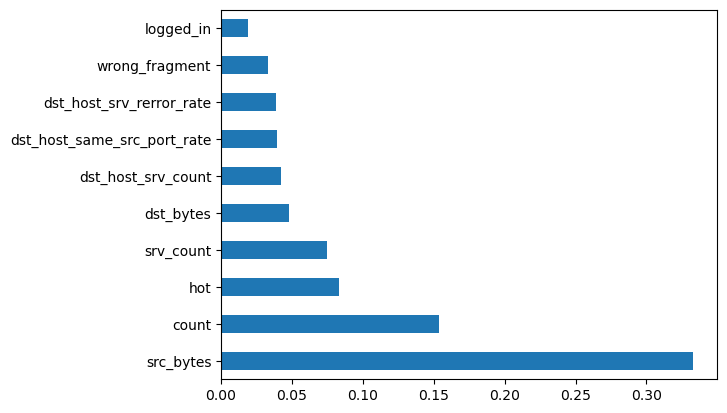

<Figure size 800x600 with 0 Axes>

In [67]:
# plot the graph of feature importances for better visualization
#feature selection of numeric binary dataset (just numeric columns )

feat_imp = pd.Series(model.feature_importances_, index=X_train_num_bin.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

# **Data Standardization**








*   Formula = z = x  -mean / standard deviation
* **Scaling vs. Normalization**: What's the difference? The difference is that, in **scaling, you're changing the range of your data**. When you standardize a normal distribution, the mean becomes 0 and the standard deviation becomes 1. This allows you to **easily calculate the probability** of certain values occurring in your distribution, or to compare data sets with different means and standard deviations... while in **normalization you're changing the shape of the distribution** of your data.

* **Standardization is useful** when your data has varying scales and the **algorithm you are using does make assumptions about your data having a Gaussian distribution**, such as linear regression, logistic regression and linear discriminant analysis

* **Normalization is useful** when your data has varying scales and the **algorithm you are using does not make assumptions about the distribution** of your data, such as k-nearest neighbors and artificial neural networks. Standardization assumes that your data has a Gaussian (bell curve) distribution

*   X for data
*   y_bin for binary classification label
*   y_multi for multi-class classification label

In [68]:
# selecting numeric attributes columns from data
numeric_col = train_data.select_dtypes(include='number').columns    

In [69]:
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [70]:

std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [71]:
for i in train_data:
    if(train_data[i].nunique() <=3):
        print(i)

protocol_type
land
wrong_fragment
logged_in
root_shell
su_attempted
num_shells
num_outbound_cmds
is_host_login
is_guest_login


In [72]:
# requiredcol - we can select them on basis of analysis

requiredcol = ['protocol_type','service','flag','duration',
  'src_bytes','count','srv_count',
  'dst_bytes',
  'same_srv_rate','dst_host_srv_count',
  'dst_host_count',
  'logged_in','is_host_login']

In [73]:
for i in train_data[requiredcol]:
    print(i, train_data[i].nunique())

protocol_type 3
service 70
flag 11
duration 2981
src_bytes 3341
count 512
srv_count 509
dst_bytes 9326
same_srv_rate 101
dst_host_srv_count 256
dst_host_count 256
logged_in 2
is_host_login 2


In [74]:
new_train_data=train_data[requiredcol].copy()
# selecting numeric attributes columns from data
numeric_col_new = new_train_data.select_dtypes(include='number').columns    

In [75]:
data = train_data[requiredcol]

In [76]:

data

,protocol_type,service,flag,duration,src_bytes,count,srv_count,dst_bytes,same_srv_rate,dst_host_srv_count,dst_host_count,logged_in,is_host_login
0,tcp,ftp_data,SF,0,491,2,2,0,1.00,25,150,0,0
1,udp,other,SF,0,146,13,1,0,0.08,1,255,0,0
2,tcp,private,S0,0,0,123,6,0,0.05,26,255,0,0
3,tcp,http,SF,0,232,5,5,8153,1.00,255,30,1,0
4,tcp,http,SF,0,199,30,32,420,1.00,255,255,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,tcp,private,S0,0,0,184,25,0,0.14,25,255,0,0
125969,udp,private,SF,8,105,2,2,145,1.00,244,255,0,0
125970,tcp,smtp,SF,0,2231,1,1,384,1.00,30,255,1,0
125971,tcp,klogin,S0,0,0,144,8,0,0.06,8,255,0,0


In [77]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [78]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [79]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [80]:
categorical.columns

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2', 's

In [81]:
train_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [82]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)
Normalized_dataset.shape

(125973, 94)

In [83]:
X = Normalized_dataset
y_bin = numeric_bin_data['intrusion']

In [84]:
def print_result(y_test,y_pred):
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [85]:
def plot_cm(y_test,y_pred):
    cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels= ['abnormal','normal'])
    cm.plot()
    plt.show()

# **Modeling**


*   Binary Classification



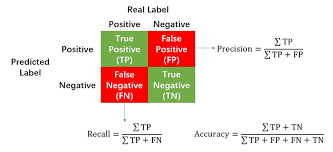

## Binary Classification

In [86]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)

### K-nearest-neighbor Classifier (Binary Classification)

In [87]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [88]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  99.51736838762939


Accuracy of Model      :  0.9951736838762939
Precision of Model     :  0.9966535197800884
Recall of Model        :  0.9942768570406582
F1 Score of Model      :  0.9954637698460069
ROC_AUC score of Model :  0.9952362546072856


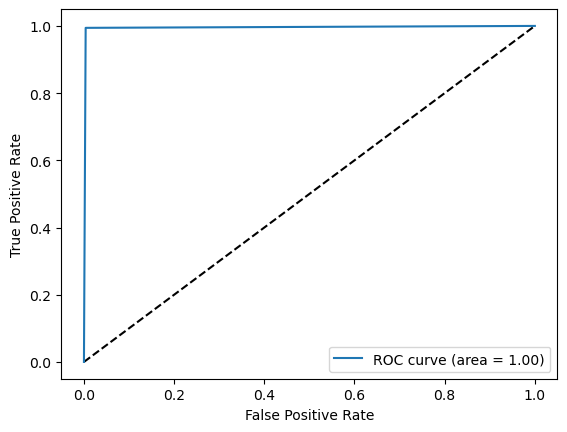

In [89]:
print_result(y_test,y_pred)

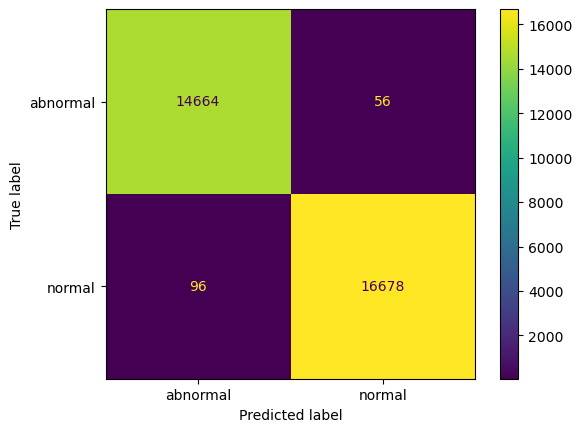

In [90]:
plot_cm(y_test,y_pred)

In [91]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      1.00      0.99     14720
      normal       1.00      0.99      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [92]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.004826316123706102
Mean Squared Error -  0.004826316123706102
Root Mean Squared Error -  0.06947169296703588
R2 Score -  98.06187500324
Accuracy -  99.51736838762939


## Random Forest

In [93]:
rf=RandomForestClassifier() # creating model
rf.fit(X_train,y_train) # training model on training dataset


RandomForestClassifier()

In [94]:
y_pred=rf.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("Random Forest Binary Set-Accuracy is ", ac)

Random Forest Binary Set-Accuracy is  99.84441480917


Accuracy of Model      :  0.9984441480917
Precision of Model     :  0.9981533329362007
Recall of Model        :  0.9989269106951234
F1 Score of Model      :  0.9985399719912994
ROC_AUC score of Model :  0.9984104662171269


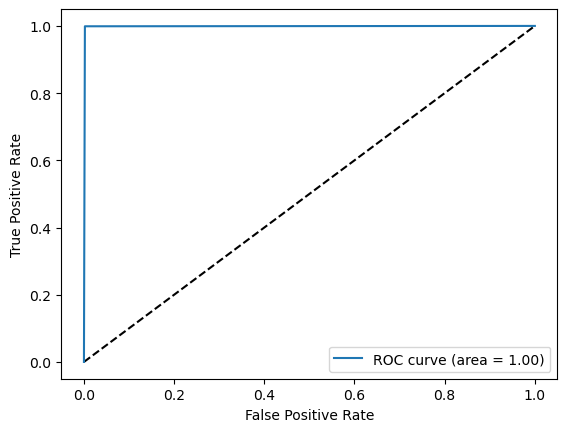

In [95]:
print_result(y_test,y_pred)

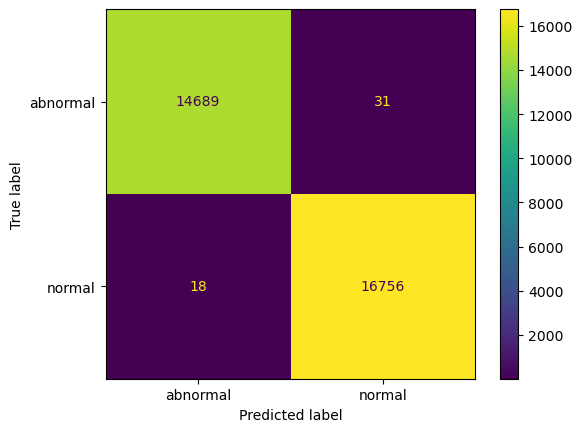

In [96]:
plot_cm(y_test,y_pred)

In [97]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [98]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0015558519082999936
Mean Squared Error -  0.0015558519082999936
Root Mean Squared Error -  0.03944428866515397
R2 Score -  99.37506925508421
Accuracy -  99.84441480917


## XGBOOST

In [99]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train) # training model on training dataset


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [100]:
y_pred=xgb.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("XGBoost Binary Set-Accuracy is ", ac)

XGBoost Binary Set-Accuracy is  99.84441480917


Accuracy of Model      :  0.9984441480917
Precision of Model     :  0.9983314462785293
Recall of Model        :  0.998748062477644
F1 Score of Model      :  0.9985397109223663
ROC_AUC score of Model :  0.9984229442823002


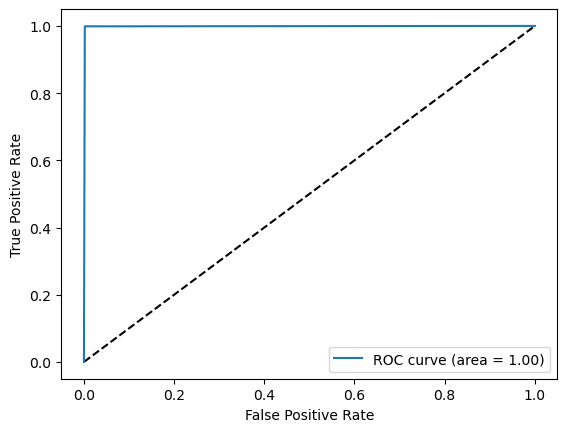

In [101]:
print_result(y_test,y_pred)

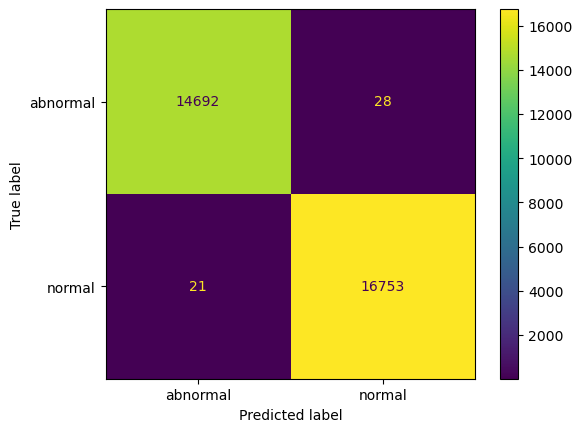

In [102]:
plot_cm(y_test,y_pred)

In [103]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [104]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0015558519082999936
Mean Squared Error -  0.0015558519082999936
Root Mean Squared Error -  0.03944428866515397
R2 Score -  99.37502065502511
Accuracy -  99.84441480917


## Saving the model :
    library used -> pickle.py

In [105]:
import pickle

In [106]:
with open('KNN','wb') as f:

    pickle.dump(knn,f)

In [107]:
with open('KNN','rb') as f:

    knn_model_load = pickle.load(f)

In [108]:
knn_model_load.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [109]:
with open('RF.pkl','wb') as f:

    pickle.dump(rf,f)

In [110]:
with open('RF.pkl','rb') as f:

    rf_model_load = pickle.load(f)

In [111]:
rf_model_load.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [112]:
with open('XGB.pkl','wb') as f:

    pickle.dump(xgb,f)

In [113]:
with open('XGB.pkl','rb') as f:

    xgb_model_load = pickle.load(f)

In [114]:
xgb_model_load.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [115]:
X_test.iloc[0,:].values

array([False, False, True, False, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, True, False, 0, 36, 2, 4, 0, 1.0, 171, 67, 0, 0],
      dtype=object)

In [116]:
X_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,duration,src_bytes,count,srv_count,dst_bytes,same_srv_rate,dst_host_srv_count,dst_host_count,logged_in,is_host_login
69124,False,True,False,False,False,False,False,False,False,False,...,0,0,20,12,0,0.60,12,255,0,0
20983,False,True,False,False,False,False,False,False,False,False,...,0,0,146,21,0,0.14,21,255,0,0
113664,False,True,False,False,False,False,False,False,False,False,...,0,0,117,20,0,0.17,1,58,0,0
110444,False,True,False,False,False,False,False,False,False,False,...,0,11,2,2,0,1.00,68,28,1,0
75941,False,False,True,False,False,False,False,False,False,False,...,0,516,265,265,4,1.00,255,255,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,False,True,False,False,False,False,False,False,False,False,...,0,0,258,4,0,0.02,4,255,0,0
103694,False,True,False,False,False,False,False,False,False,False,...,0,0,24,4,0,0.17,4,255,0,0
860,False,True,False,False,False,False,False,False,False,False,...,0,0,258,6,0,0.02,6,255,0,0
15795,False,True,False,False,False,False,False,False,False,False,...,0,309,5,5,4281,1.00,255,21,1,0


In [117]:
y_train

69124     0
20983     0
113664    0
110444    1
75941     1
         ..
119879    0
103694    0
860       0
15795     1
121958    1
Name: intrusion, Length: 94479, dtype: int32

In [118]:
X_train.loc[y_train==1,:].to_csv("noraml.csv")

In [119]:
X_train.loc[y_train==0,:].to_csv("abnoraml.csv")